In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Flatten, Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [3]:
#모델 입력 차원 결정
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)

z_dim = 100

In [5]:
#Generator
def build_generator(img_shape, z_dim):
    model = Sequential()

    model.add(Dense(128, input_dim=z_dim))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(28*28*1, activation='tanh'))
    model.add(Reshape(img_shape))
    return model

In [6]:
#Discriminator
def build_discriminator(img_shape):
    model=Sequential()
    model.add(Flatten(input_shape = img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha=0.01))
    model.add(Dense(1, activation='sigmoid'))
    return model

In [7]:
#GAN
def build_gan(generator, discriminator):
    
    model = Sequential()

    model.add(generator)

    model.add(discriminator)

    return model

discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(), metrics=['accuracy'])

generator = build_generator(img_shape, z_dim)

discriminator.trainable = False

gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

In [13]:
#Gan train
losses = list()
accuracies = list()
iteration_checkpoints = list()

def train(iterations, batch_size, sample_interval):

    (X_train, _), (_, _) = mnist.load_data()

    X_train = X_train/127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    real = np.ones((batch_size, 1))

    fake = np.zeros((batch_size,1))

    for iteration in range(iterations):

        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        z = np.random.normal(0,1,(batch_size,100))
        gen_imgs = generator.predict(z)
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5*np.add(d_loss_real, d_loss_fake)

        z = np.random.normal(0,1,(batch_size, 100))

        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval ==0:
            losses.append((d_loss, g_loss))
            accuracies.append(100.0*accuracy)
            iteration_checkpoints.append(iteration+1)

            print("%d [D 손실: %f, 정확도: %.2f%%] [G 손실: %f]"%(iteration+1, d_loss, 100.0*accuracy, g_loss))
            sample_images(generator)

In [19]:
#생성된 이미지 출력
def sample_images(generator, image_grid_rows=4, image_grid_columns=4):

    z = np.random.normal(0,1,(image_grid_rows*image_grid_columns, z_dim))

    gen_imgs = generator.predict(z)

    gen_imgs = 0.5*gen_imgs + 0.5
    
    fig, axs = plt.subplots(image_grid_rows, image_grid_columns, figsize=(4,4), sharey=True, sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i,j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i,j].axis('off')
            cnt += 1

1000 [D 손실: 0.124088, 정확도: 95.31%] [G 손실: 5.307220]
2000 [D 손실: 0.115925, 정확도: 96.09%] [G 손실: 6.281748]
3000 [D 손실: 0.293839, 정확도: 89.45%] [G 손실: 4.240885]
4000 [D 손실: 0.314847, 정확도: 87.50%] [G 손실: 4.400291]
5000 [D 손실: 0.375411, 정확도: 81.64%] [G 손실: 3.476495]
6000 [D 손실: 0.266014, 정확도: 89.06%] [G 손실: 3.819173]
7000 [D 손실: 0.632690, 정확도: 72.27%] [G 손실: 2.313197]
8000 [D 손실: 0.311353, 정확도: 86.33%] [G 손실: 3.107885]
9000 [D 손실: 0.379828, 정확도: 83.20%] [G 손실: 2.734413]
10000 [D 손실: 0.675596, 정확도: 71.48%] [G 손실: 2.225075]
11000 [D 손실: 0.295477, 정확도: 86.33%] [G 손실: 2.713581]
12000 [D 손실: 0.417950, 정확도: 82.81%] [G 손실: 2.968989]
13000 [D 손실: 0.475733, 정확도: 78.12%] [G 손실: 1.909655]
14000 [D 손실: 0.365836, 정확도: 82.03%] [G 손실: 2.935431]
15000 [D 손실: 0.339922, 정확도: 83.98%] [G 손실: 2.110866]
16000 [D 손실: 0.394061, 정확도: 82.81%] [G 손실: 2.337580]
17000 [D 손실: 0.398998, 정확도: 80.86%] [G 손실: 2.838581]
18000 [D 손실: 0.426661, 정확도: 79.69%] [G 손실: 2.647552]
19000 [D 손실: 0.556526, 정확도: 76.95%] [G 손실: 2.198976]
20

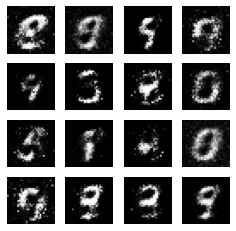

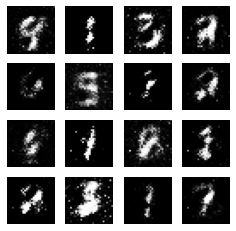

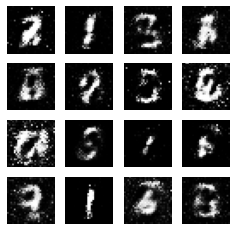

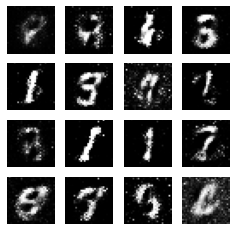

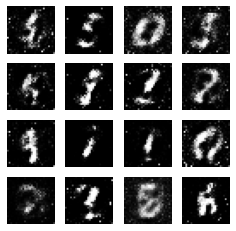

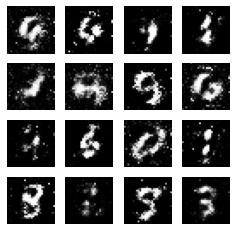

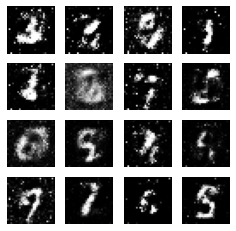

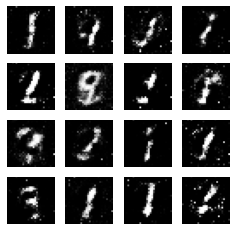

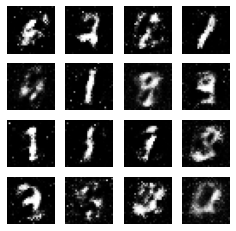

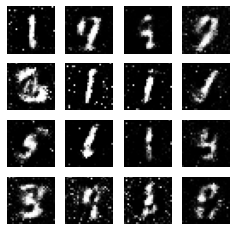

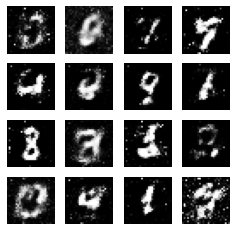

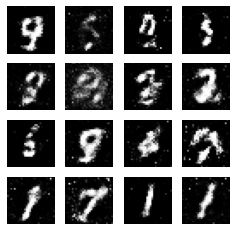

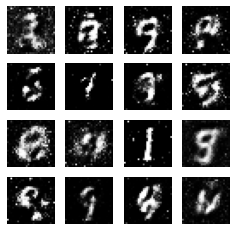

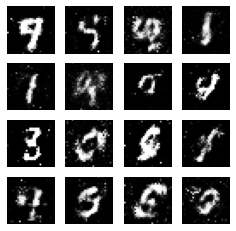

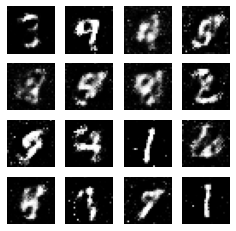

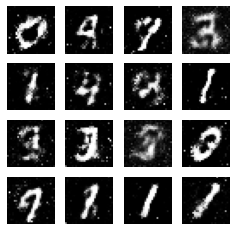

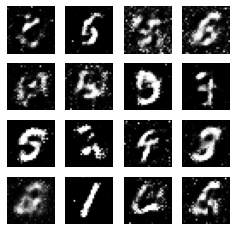

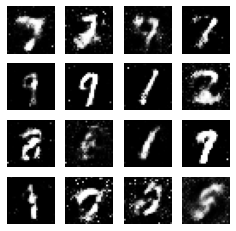

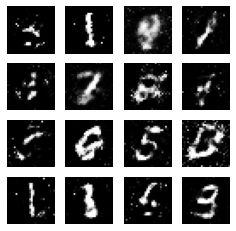

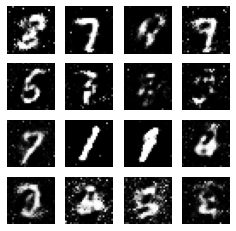

In [20]:
iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations, batch_size, sample_interval)